In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("/content/ReactionTimeExperiment.csv")

print(data)


        time keys  matches  errors  participant  block    exp  order handed  \
0      704.0    j      1.0     0.0     468305.0    1.0     CM    2.0      r   
1      546.0    k      0.0     0.0     468305.0    1.0     CM    2.0      r   
2      529.0    k      0.0     0.0     468305.0    1.0     CM    2.0      r   
3      479.0    j      1.0     0.0     468305.0    1.0     CM    2.0      r   
4      417.0    k      0.0     0.0     468305.0    1.0     CM    2.0      r   
...      ...  ...      ...     ...          ...    ...    ...    ...    ...   
7916   898.0    j      1.0     0.0     780499.0    3.0  VS-32    6.0      r   
7917  1194.0    k      0.0     0.0     780499.0    3.0  VS-32    6.0      r   
7918   902.0    j      1.0     0.0     780499.0    3.0  VS-32    6.0      r   
7919  1722.0    k      0.0     0.0     780499.0    3.0  VS-32    6.0      r   
7920   520.0    j      1.0     0.0     780499.0    3.0  VS-32    6.0      r   

       age gender  Unnamed: 11  
0     22.0      f 

In [ ]:
print(data.participant.nunique())
# Anzahl Teilnehmer:innen

31
[468305.     nan 998582. 350768. 539888. 125763. 584881. 358723. 267272.
 884334. 244152. 900296. 584031. 507352. 440003. 283194. 470711. 789877.
 945198. 595134. 520487. 283824. 163731. 726066. 189857. 271476. 282026.
 780499. 342855. 892552. 926379. 743237.]


In [ ]:
# Demographische Daten

# Geschlecht
print(data.groupby("gender").participant.nunique())

# Händigkeit
print(data.groupby("handed").participant.nunique())

# Alter
print("Mean Age:", data.age.mean(), "Std. Dev:", data.age.std())
print("Mean Age:", data.groupby(["participant"])['age'].first().mean(), "Std. Dev:", data.groupby("participant").age.first().std())

# Welche Gruppe wird repräsentiert
# Geübte/Unerfahrene Nutzer
# Eigenschaften der Teilnehmenden
# Qualitative Aussagen der Teilnehmenden
# Wieviele? Geschlecht? Alter?

# Je nach Experiment
# Bildung? Stand? Expertise? Händigkeit?

gender
d     1
f     5
m    25
Name: participant, dtype: int64
handed
l     4
r    28
Name: participant, dtype: int64
Mean Age: 24.719156459148884 Std. Dev: 2.42855486922989
Mean Age: 24.741935483870968 Std. Dev: 2.4761225324484504


In [ ]:
# Teilnahme an Experimenten
print(data.groupby("exp").participant.nunique())

exp
CM       29
NM       29
PM       29
SR       29
VS       18
VS-1      4
VS-16     4
VS-2      4
VS-32     4
VS-4      4
VS-8      4
cm        1
nm        1
pm        1
sr        1
vs        1
vs-1      1
vs-16     1
vs-2      1
vs-32     1
vs-4      1
vs-8      1
Name: participant, dtype: int64


<ipython-input-16-5c9b11dd2c22>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=plotdata.participant, y=plotdata.time, palette="husl")#, hue=plotdata.block)


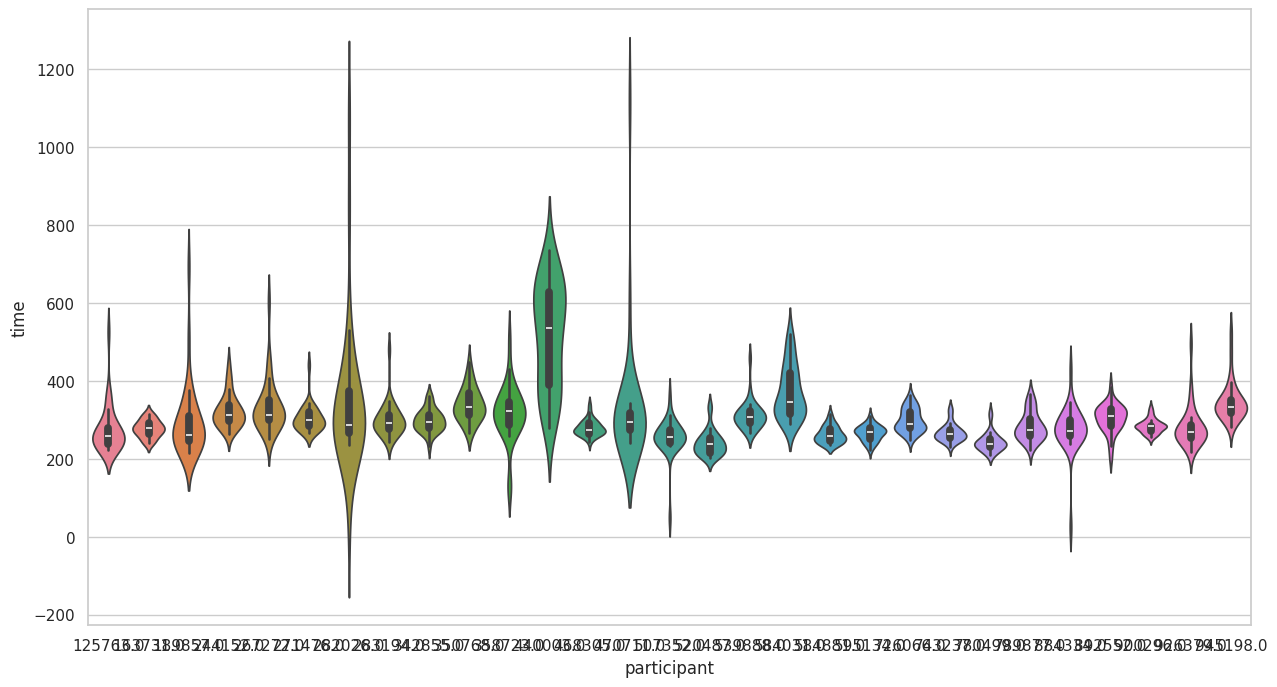

In [ ]:
#Plot
import matplotlib.pyplot as plt

plotdata = data[(data.exp == "SR")] # & (data.participant < 200000)]

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
#plt.xticks(rotation='vertical')

#ax = sns.barplot(x=plotdata.participant, y=plotdata.time, palette="husl")#, hue=plotdata.block)
ax = sns.violinplot(x=plotdata.participant, y=plotdata.time, palette="husl")#, hue=plotdata.block)
#ax = sns.boxenplot(x=plotdata.participant, y=plotdata.time, palette="husl")#, hue=plotdata.block)
#ax = sns.violinplot(x=plotdata.participant, y=plotdata.time, palette="husl")#, hue=plotdata.block)

#ax.set_ylim(150,1000)
#ax.set_ylim(400,700)
plt.show()

In [ ]:
plotdata = data[data.exp == "NM"]

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
#plt.xticks(rotation='vertical')

ax = sns.boxplot(x=plotdata.block, y=plotdata.time, palette="husl")

ax.set_ylim(250,1000)
plt.show()



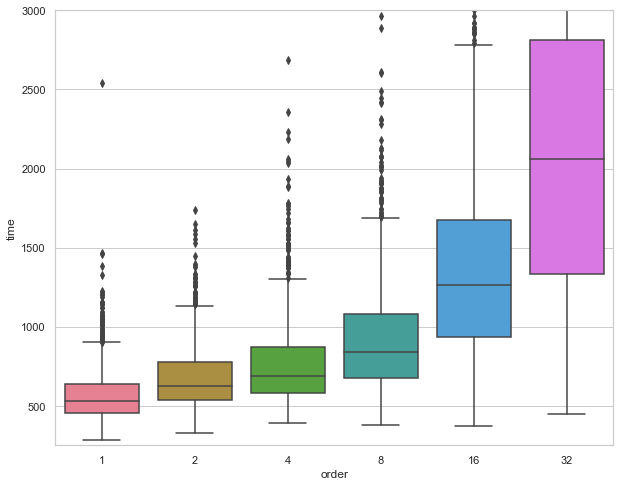

In [ ]:
plotdata = data[data.exp == "VS"]

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
#plt.xticks(rotation='vertical')

ax = sns.boxplot(x=2**(plotdata.order-1), y=(plotdata.time), palette="husl")

ax.set_ylim(250,3000)
plt.show()




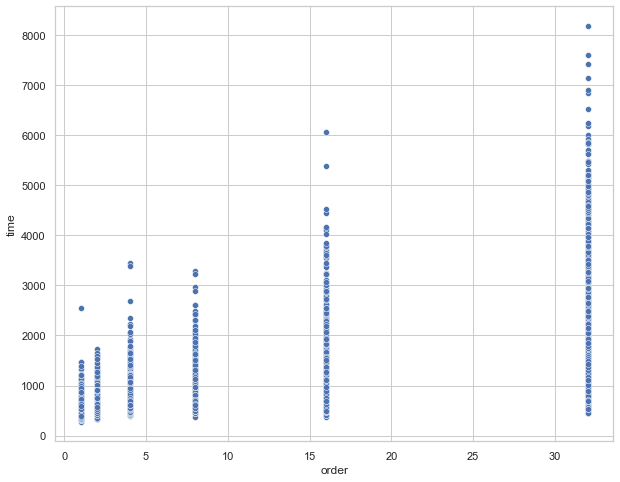

In [ ]:
plotdata = data[data.exp == "VS"]

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
#plt.xticks(rotation='vertical')

ax = sns.scatterplot(x=2**(plotdata.order-1), y=plotdata.time, palette="husl")

#ax.set_ylim(250,3000)
plt.show()





# Backup

In [ ]:
import scipy.stats as st
n = len(plotdata.time)
a = plotdata.time
st.t.interval(0.95, n-1, loc=np.mean(a), scale=st.sem(a))